In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("POP.csv",usecols=["value","date"])
data.head()

Matplotlib is building the font cache; this may take a moment.


,value,date
0,156309.0,1952-01-01
1,156527.0,1952-02-01
2,156731.0,1952-03-01
3,156943.0,1952-04-01
4,157140.0,1952-05-01


In [23]:
data.shape

(816, 2)

In [24]:
data=data.set_index("date")
data.head()

,value
date,
1952-01-01,156309.0
1952-02-01,156527.0
1952-03-01,156731.0
1952-04-01,156943.0
1952-05-01,157140.0


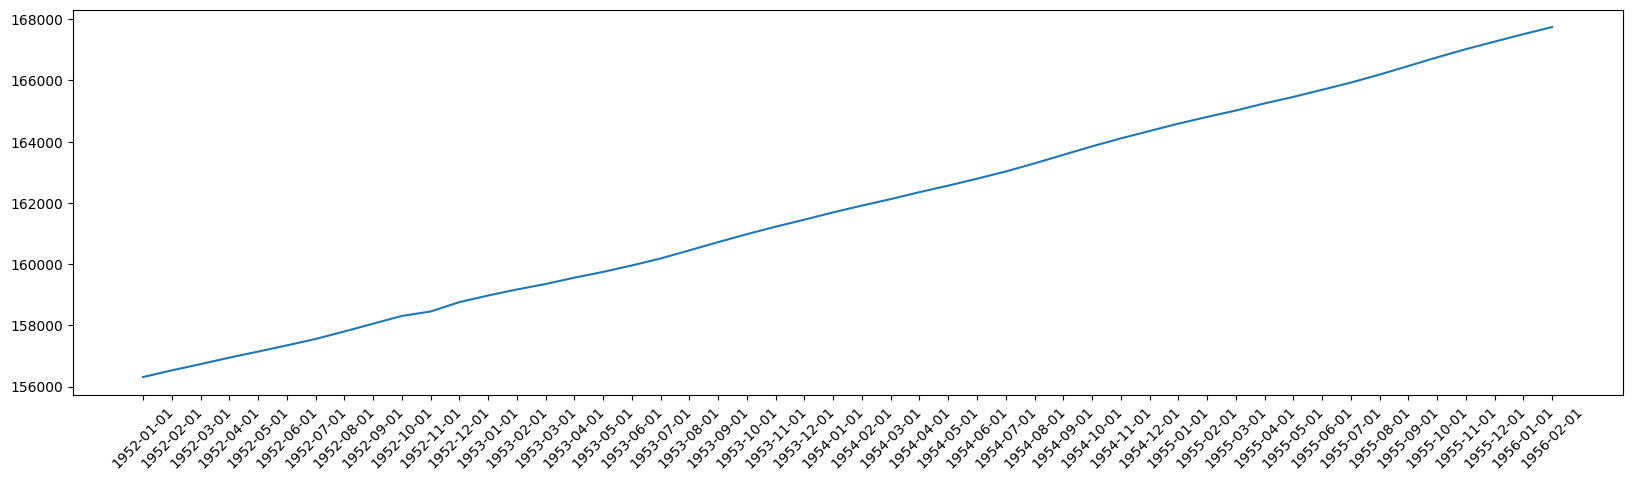

In [28]:
plt.figure(figsize=(20,5))
plt.plot(data[:50])
plt.xticks(rotation=45)
plt.show()

In [38]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# moving average
rolling_series = data[:50].rolling(5)

rolling_mean =  rolling_series.mean()

rolling_mean.head(10)

,value
date,
1952-01-01,NaN
1952-02-01,NaN
1952-03-01,NaN
1952-04-01,NaN
1952-05-01,156730.0
1952-06-01,156936.8
1952-07-01,157142.0
1952-08-01,157355.4
1952-09-01,157577.4


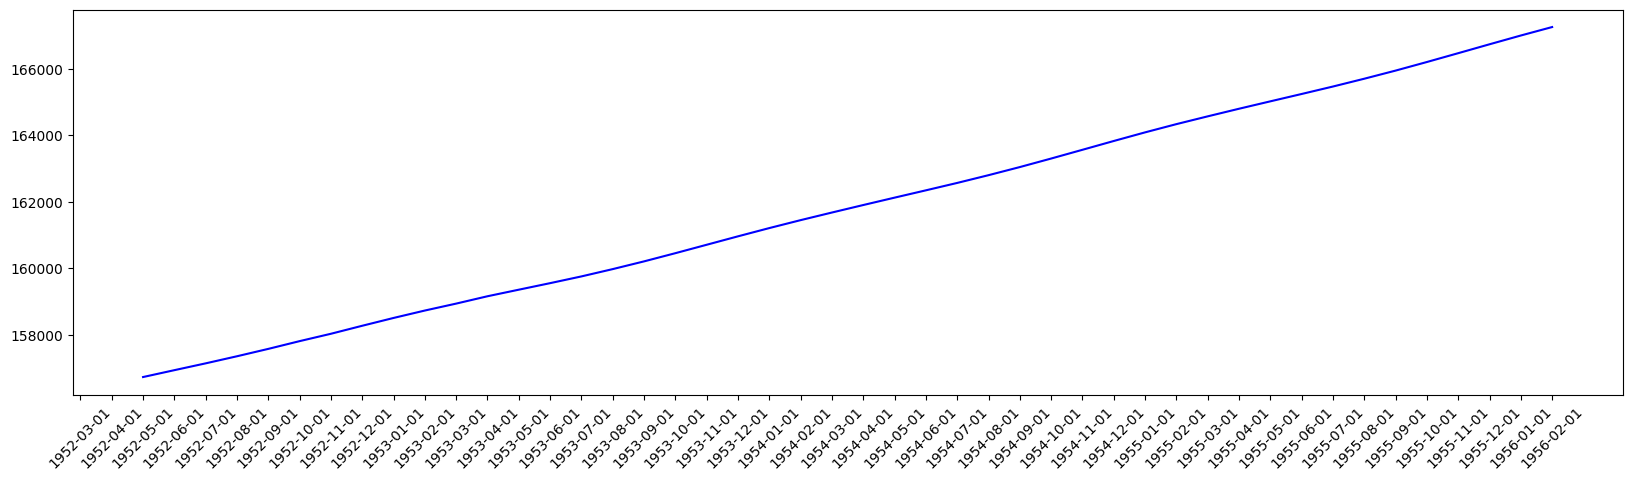

In [39]:
plt.figure(figsize=(20,5))
plt.plot(rolling_mean,color="blue")
plt.xticks(rotation=45)
plt.show()

In [40]:
# Simple exponential Smoothing-method is particularly useful for data with no clear trend or seasonal pattern.
# but this data has trend

fit1 = SimpleExpSmoothing(data[:50]).fit(smoothing_level=0.2,optimized=False)

fit2 = SimpleExpSmoothing(data[:50]).fit(smoothing_level=0.8,optimized=False)


/home/varaprasad/miniconda3/envs/llama/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/varaprasad/miniconda3/envs/llama/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


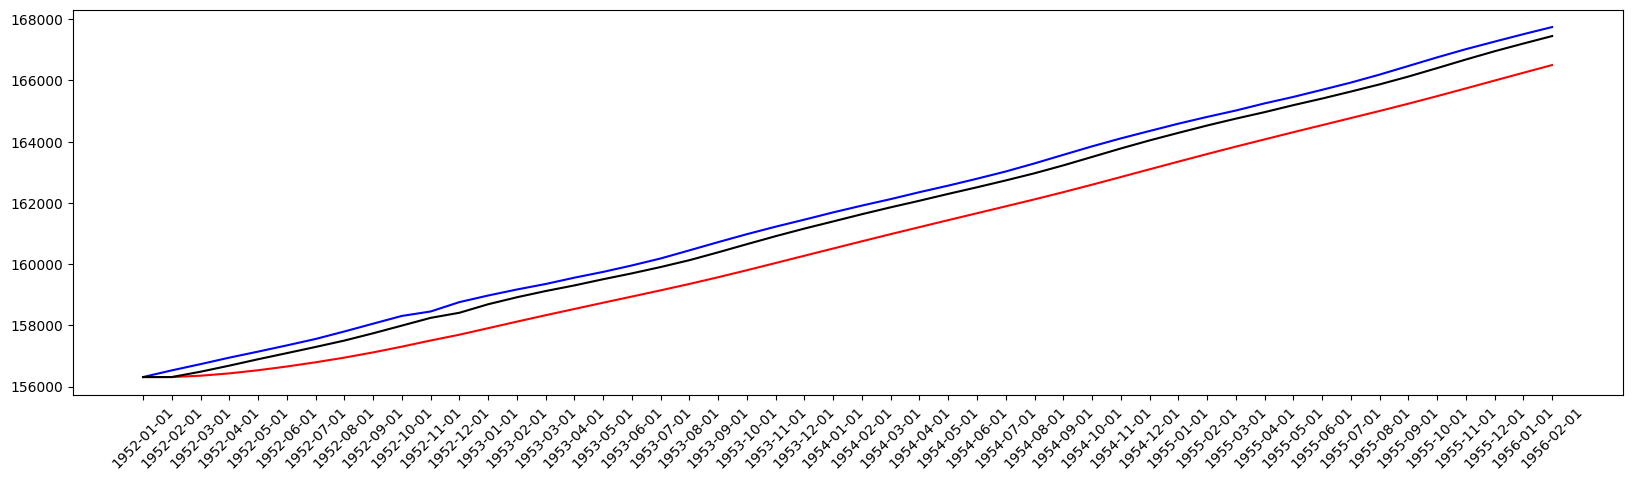

In [42]:
plt.figure(figsize=(20,5))
plt.plot(data[:50],color="blue")
plt.xticks(rotation=45)

plt.plot(fit1.fittedvalues,color="red")
plt.plot(fit2.fittedvalues,color="black")

plt.show()

In [43]:
# Holt method

fit1 = Holt(data[:50]).fit() # for linear data

fit2 = Holt(data[:50],exponential=True).fit() # for exponetial data


/home/varaprasad/miniconda3/envs/llama/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/varaprasad/miniconda3/envs/llama/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


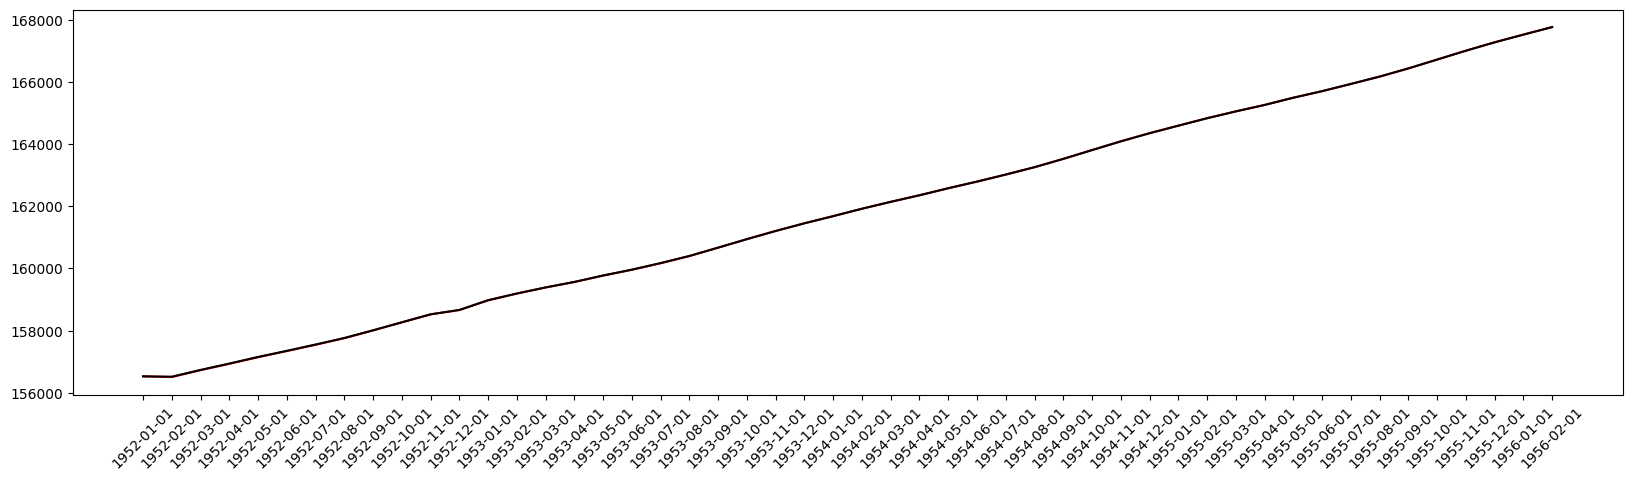

In [45]:
plt.figure(figsize=(20,5))
plt.plot(data[:50],color="blue")
plt.xticks(rotation=45)

plt.plot(fit1.fittedvalues,color="red")
plt.plot(fit2.fittedvalues,color="black")

plt.show()